In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
wire_path="C:/Users/7srav/Downloads/wirecapture.csv"
wire_data=pd.read_csv(wire_path)
wire_data.head(15)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,fe80::f2ed:b8ff:fe4b:448c,ff02::1,ICMPv6,142,Router Advertisement from f0:ed:b8:4b:44:8c
1,2,2.867093,192.168.29.1,224.0.0.1,IGMPv3,50,"Membership Query, general"
2,3,4.621094,192.168.29.203,224.0.0.22,IGMPv3,54,Membership Report / Join group 224.0.0.251 for...
3,4,6.622373,192.168.29.203,224.0.0.22,IGMPv3,54,Membership Report / Join group 239.255.255.250...
4,5,9.216073,7e:ea:7c:14:9b:c1,Broadcast,ARP,42,Who has 192.168.29.1? Tell 192.168.29.199
5,6,9.625130,192.168.29.119,224.0.0.22,IGMPv3,62,Membership Report / Join group 239.255.255.250...
6,7,10.625111,192.168.29.203,224.0.0.22,IGMPv3,54,Membership Report / Join group 224.0.0.252 for...
7,8,13.988090,2405:201:6826:6034:74b8:e7a4:75fc:4ece,2405:201:6826:6034::c0a8:1d01,DNS,97,Standard query 0xaa53 A beacons2.gvt2.com
8,9,13.988398,2405:201:6826:6034:74b8:e7a4:75fc:4ece,2405:201:6826:6034::c0a8:1d01,DNS,97,Standard query 0xcad1 AAAA beacons2.gvt2.com
9,10,13.988633,2405:201:6826:6034:74b8:e7a4:75fc:4ece,2405:201:6826:6034::c0a8:1d01,DNS,97,Standard query 0x7d0c HTTPS beacons2.gvt2.com


In [3]:
sources=wire_data.groupby("Source").Source.count()
sources.sort_values()

Source
2404:6800:4002:805::2003                   1
2404:6800:4003:c11::bc                     1
2600:9000:245b:b000:19:9934:6a80:93a1      1
2600:9000:257b:2200:11:f728:3040:93a1      1
7e:ea:7c:14:9b:c1                          1
192.168.29.1                               3
AzureWav_3d:25:53                          3
fe80::f2ed:b8ff:fe4b:448c                  3
192.168.29.119                             4
192.168.29.203                             4
2405:201:6826:6034::c0a8:1d01              4
2404:6800:4009:82b::2004                   6
Serverco_4b:44:8c                          9
2a00:1450:4001:811::2003                  14
2405:201:6826:6034:74b8:e7a4:75fc:4ece    26
Name: Source, dtype: int64

In [4]:
destinations =wire_data.groupby("Destination").Source.count()
destinations.sort_values()

Destination
192.168.29.203                             1
2600:9000:257b:2200:11:f728:3040:93a1      1
2600:9000:245b:b000:19:9934:6a80:93a1      1
2404:6800:4002:805::2003                   1
2404:6800:4003:c11::bc                     1
fe80::f2ed:b8ff:fe4b:448c                  1
AzureWav_3d:25:53                          2
ff02::1                                    2
224.0.0.1                                  2
192.168.29.255                             3
Serverco_4b:44:8c                          3
2405:201:6826:6034::c0a8:1d01              4
224.0.0.22                                 5
2404:6800:4009:82b::2004                   6
Broadcast                                  8
2a00:1450:4001:811::2003                  11
2405:201:6826:6034:74b8:e7a4:75fc:4ece    29
Name: Source, dtype: int64

In [5]:
protocols=wire_data.groupby("Protocol").Source.count()
protocols.sort_values()

Protocol
ECHO       1
UDP        3
DNS        6
ICMPv6     6
IGMPv3     7
TCP        8
ARP       13
QUIC      37
Name: Source, dtype: int64

In [6]:
network=nx.from_pandas_edgelist(wire_data,source='Source', target='Destination',edge_attr=None)

network.nodes()

NodeView(('fe80::f2ed:b8ff:fe4b:448c', 'ff02::1', '192.168.29.1', '224.0.0.1', '192.168.29.203', '224.0.0.22', '7e:ea:7c:14:9b:c1', 'Broadcast', '192.168.29.119', '2405:201:6826:6034:74b8:e7a4:75fc:4ece', '2405:201:6826:6034::c0a8:1d01', '2a00:1450:4001:811::2003', '2600:9000:245b:b000:19:9934:6a80:93a1', '2600:9000:257b:2200:11:f728:3040:93a1', '192.168.29.255', 'Serverco_4b:44:8c', '2404:6800:4009:82b::2004', '2404:6800:4002:805::2003', 'AzureWav_3d:25:53', '2404:6800:4003:c11::bc'))

In [7]:
network.edges()

EdgeView([('fe80::f2ed:b8ff:fe4b:448c', 'ff02::1'), ('fe80::f2ed:b8ff:fe4b:448c', '2405:201:6826:6034:74b8:e7a4:75fc:4ece'), ('192.168.29.1', '224.0.0.1'), ('192.168.29.1', '192.168.29.203'), ('192.168.29.203', '224.0.0.22'), ('224.0.0.22', '192.168.29.119'), ('7e:ea:7c:14:9b:c1', 'Broadcast'), ('Broadcast', 'Serverco_4b:44:8c'), ('192.168.29.119', '192.168.29.255'), ('2405:201:6826:6034:74b8:e7a4:75fc:4ece', '2405:201:6826:6034::c0a8:1d01'), ('2405:201:6826:6034:74b8:e7a4:75fc:4ece', '2a00:1450:4001:811::2003'), ('2405:201:6826:6034:74b8:e7a4:75fc:4ece', '2600:9000:245b:b000:19:9934:6a80:93a1'), ('2405:201:6826:6034:74b8:e7a4:75fc:4ece', '2600:9000:257b:2200:11:f728:3040:93a1'), ('2405:201:6826:6034:74b8:e7a4:75fc:4ece', '2404:6800:4009:82b::2004'), ('2405:201:6826:6034:74b8:e7a4:75fc:4ece', '2404:6800:4002:805::2003'), ('2405:201:6826:6034:74b8:e7a4:75fc:4ece', '2404:6800:4003:c11::bc'), ('Serverco_4b:44:8c', 'AzureWav_3d:25:53')])

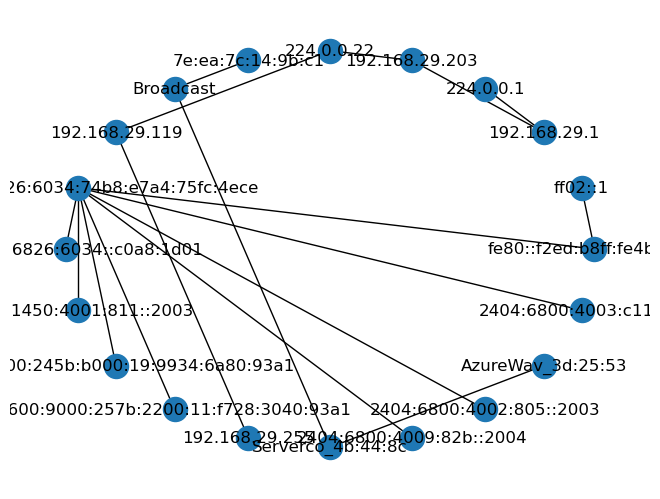

In [8]:
nx.draw_circular(network, with_labels = True) 

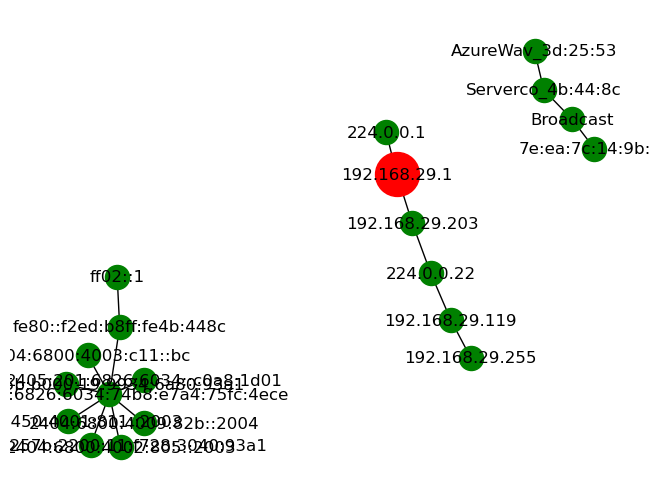

In [9]:
suspect=("192.168.29.1")
pos=nx.spring_layout(network)
nx.draw(network,pos,node_color="green",
       node_size=300, with_labels=True)
options ={"node_size":1000,"node_color":"r"}
nx.draw_networkx_nodes(network,pos,nodelist=[suspect],**options)

plt.show()

In [10]:
wire_data.loc[wire_data['Source']=='192.168.29.1']

,No.,Time,Source,Destination,Protocol,Length,Info
1,2,2.867093,192.168.29.1,224.0.0.1,IGMPv3,50,"Membership Query, general"
48,49,19.586710,192.168.29.1,192.168.29.203,ECHO,43,Request
70,71,22.937160,192.168.29.1,224.0.0.1,IGMPv3,50,"Membership Query, general"
